In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create data frame containing all 6 day-long load profiles
general_load_profile = (pd.read_csv("../data/Load Profile - Sheet5.csv")
                        .T
                        .drop("Unnamed: 0")
                        .rename(columns={
                            0 : "Weekend Rain",
                            1 : "Weekend Dry",
                            2 : "Weekday School Rain",
                            3 : "Weekday School Dry",
                            4 : "Weekday Break Rain",
                            5 : "Weekday Break Dry"}
                           )
                       ).astype("float")

In [3]:
general_load_profile

,Weekend Rain,Weekend Dry,Weekday School Rain,Weekday School Dry,Weekday Break Rain,Weekday Break Dry
1:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
2:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
3:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
4:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
5:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
6:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
7:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
8:00:00 AM,726.0,726.0,726.0,726.0,726.0,726.0
9:00:00 AM,5250.0,6205.0,5716.0,5716.0,4772.0,5727.0
10:00:00 AM,5250.0,6205.0,5716.0,5716.0,4772.0,5727.0


In [6]:
# Create empty dataframe that will become the year long load profile
load_profile = pd.DataFrame(range(8760), index=pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1))

In [7]:
d = pd.date_range(start="1/1/2006", end="12/31/2006", freq="D")

In [8]:
# dict defining which load profile we want for weekend and weekday of each month
spec = dict(
    January=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    February=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    March=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    April=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    May=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    June=dict(weekday="Weekday School Rain", weekend="Weekend Rain"),
    July=dict(weekday="Weekday School Rain", weekend="Weekend Rain"),
    August=dict(weekday="Weekday School Rain", weekend="Weekend Rain"),
    September=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    October=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    November=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),
    December=dict(weekday="Weekday School Dry", weekend="Weekend Dry"),   
)

In [9]:
# stiches together entire year load profile based on spec
for month in spec:
    #creates a Series with number of time each day occurs in a given month.
    day_occurances = d[d.month_name() == month].day_name().value_counts()
    
    load_profile.loc[
    (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Sunday"), 0
] = np.tile(general_load_profile[spec.get(month).get("weekend")].values, int(day_occurances.get("Sunday")))

    load_profile.loc[
        (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Saturday"), 0
    ] = np.tile(general_load_profile[spec.get(month).get("weekend")].values, int(day_occurances.get("Saturday")))

    load_profile.loc[
        (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Monday"), 0
    ] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, int(day_occurances.get("Monday")))

    load_profile.loc[
        (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Tuesday"), 0
    ] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, int(day_occurances.get("Tuesday")))

    load_profile.loc[
        (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Wednesday"), 0
    ] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, int(day_occurances.get("Wednesday")))

    load_profile.loc[
        (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Thursday"), 0
    ] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, int(day_occurances.get("Thursday")))

    load_profile.loc[
        (load_profile.index.month_name() == month) & (load_profile.index.day_name() == "Friday"), 0
    ] = np.tile(general_load_profile[spec.get(month).get("weekday")].values, int(day_occurances.get("Friday")))

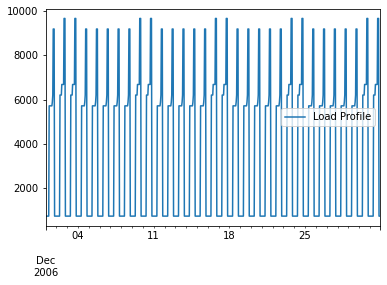

In [10]:
ax = load_profile[load_profile.index.month_name() == "December"].plot()
ax.legend(["Load Profile"])

In [11]:
# take the max load profile and repeat for the entire year
hourly_load_profile_365 = (load_profile[0].values)*1e-3  # convert W to kWh (SAM wants load profile data in kWh)

# save as a text file --- header must be there for SAM toaccurately read the file
np.savetxt("../data/hourly_load_profile_1_for_year.txt", hourly_load_profile_365, header="Load Power (kW)")